<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S6_C1_NN_keras_Fashion_Mist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalamos TensorFlow en nuestro entorno de ejecución
import tensorflow as tf

# Keras es una serie de APIs de TensorFlow que permiten simplificar el desarrollo de modelos
from tensorflow import keras

# NumPy nos permite realizar operaciones de álgebra lineal, matrices y es muy flexible para ser utilizada con TensorFlow
import numpy as np

# Matplotlib simplifica la creación de gráficos y será muy importante para presentar los resultados obtenidos
import matplotlib.pyplot as plt

In [ ]:
datos = keras.datasets.fashion_mnist

In [ ]:
# Almacenamos la información de la base de datos y la dividimos en conjuntos de prueba y entrenamiento.
(imagenes_entrenamiento, labels_entrenamiento), (imagenes_prueba, labels_prueba) = datos.load_data()
# Dado que las imágenes tienen una descripción numérica, es mucho más sencillo revisarlas por su nombre
clase_imagenes = ['Playera', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Tenis', 'Bolso', 'Botas']
# Lo anterior significa que las imágenes cuya clase esté identificada como ‘0’ serán de playeras; las identificadas con ‘1’, pantalones; y así sucesivamente.

**¿Cómo está almacenada la información de cada una de las imágenes de la base de datos?**

Por cada pixel, se guarda un valor numérico del 0 al 255 que corresponde al color de dicho pixel. Por lo tanto, será mucho más sencillo normalizar dichos valores a que estén dentro del rango [0–1]. A continuación, se muestra el vector de una de las imágenes.

In [ ]:
imagenes_entrenamiento[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  70, 228, 213, 220, 224,
        252, 239, 219, 217, 231, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 222, 214, 218, 216,
        210, 215, 217, 202, 224, 172,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  24, 254, 214, 210, 211,
        214, 215, 212, 203, 221, 167,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 254, 216, 215, 217,
        217, 216, 216, 206, 225, 150,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 247, 216, 214, 217,
        216, 214, 212, 203, 226, 136,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 245, 216, 214, 216,
        217, 215, 211, 204, 225, 125,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 247, 216, 214, 217,
        220, 217, 213, 203, 222, 147,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 216, 215, 218,
        222, 216, 214, 207, 218, 179,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 216, 217, 219,
        222, 217, 214, 210, 215, 211,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 255, 214, 218, 219,
        224, 218, 215, 211, 211, 231,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  79, 227, 209, 219, 219,
        227, 219, 215, 213, 206, 254,  58,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 146, 226, 211, 220, 219,
        228, 218, 215, 216, 205, 219, 163,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 202, 221, 214, 221, 219,
        231, 218, 215, 218, 213, 212, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 234, 217, 216, 220, 219,
        234, 217, 215, 218, 216, 223, 247,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  17, 254, 212, 219, 219, 220,
        233, 214, 216, 219, 222, 153, 238,  58,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  66, 255, 208, 220, 219, 222,
        241, 220, 218, 218, 218, 192, 242,  99,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 142, 235, 203, 218, 216, 231,
        242, 225, 233, 219, 214, 216, 238, 144,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 177, 248, 227, 229, 211, 255,
         76,   0, 247, 243, 230, 230, 249, 187,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
print(imagenes_entrenamiento.shape)
print(labels_entrenamiento.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(imagenes_prueba.shape)
print(labels_prueba.shape)

(10000, 28, 28)
(10000,)


In [ ]:
labels_entrenamiento[2]

0

**Modelo**

In [ ]:
from keras.models import Sequential
from keras import layers

modelo = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelo.fit(imagenes_entrenamiento, labels_entrenamiento, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 4.3407 - accuracy: 0.7033
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6974 - accuracy: 0.7553
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5969 - accuracy: 0.7813
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5675 - accuracy: 0.7942
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5314 - accuracy: 0.8066
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5035 - accuracy: 0.8205
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4837 - accuracy: 0.8296
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4818 - accuracy: 0.8337
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4774 - accuracy: 0.8331
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.47

**Pruebas del modelo **
Este comando nos permite conocer si nuestro modelo propuesto es adecuado. Por los resultados que arroja, podemos decir que lo es. Sin embargo, puede haber ocasiones en que necesitemos resultados con mayor precisión o mayor rapidez al momento de realizar el entrenamiento. Todo depende de las circunstancias.

In [ ]:
errores_prueba, precision_prueba = modelo.evaluate(imagenes_prueba, labels_prueba)

313/313 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.8295


In [ ]:
# La siguiente línea, nos imprime la probabilidad obtenida de que la imagen ‘0’ del set de imágenes de prueba corresponda con una de las categorías de imágenes
prediccion = modelo.predict(imagenes_prueba)


313/313 [==============================] - 1s 2ms/step
[2.2295830e-03 8.0099700e-05 1.7659350e-01 8.9923298e-04 7.6174510e-01
 1.6809611e-20 5.8445778e-02 0.0000000e+00 6.6808175e-06 3.2233898e-31]


In [ ]:
print(prediccion[8000])
print(np.round(prediccion[8000]))

[3.5532006e-35 3.4778437e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.2407472e-04 0.0000000e+00 9.9944556e-01 8.4911335e-07 4.2958179e-04]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Tenis


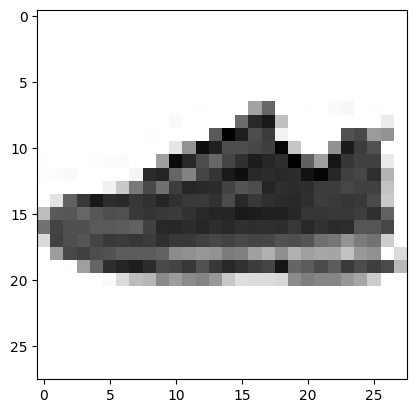

In [ ]:
# Podemos obtener el valor máximo del vector anterior para mostrar la clase a la que pertenece la imagen
print(clase_imagenes[np.argmax(prediccion[8000])])
# Verificamos revisando la imagen
plt.imshow(imagenes_prueba[8000], cmap=plt.cm.binary)

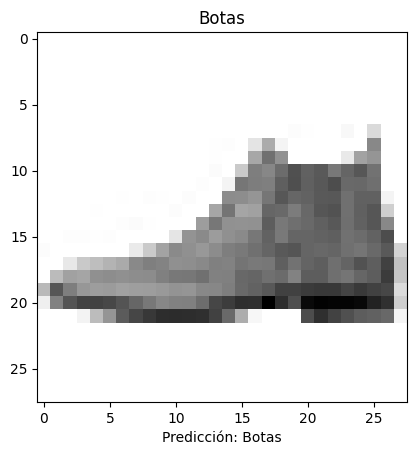

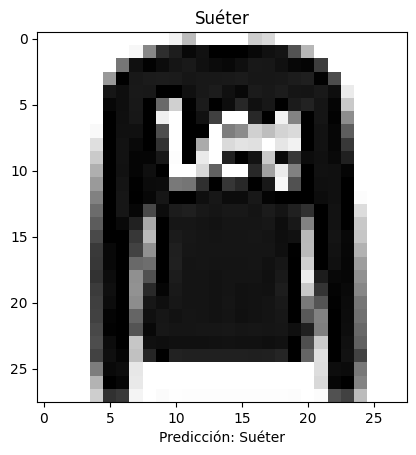

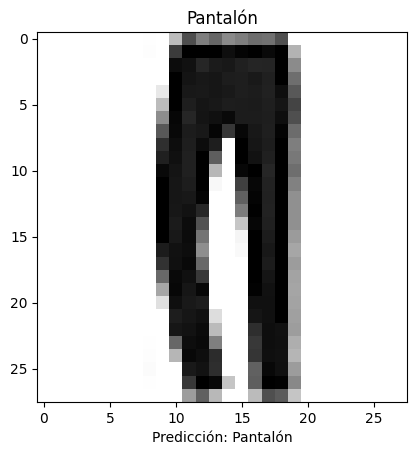

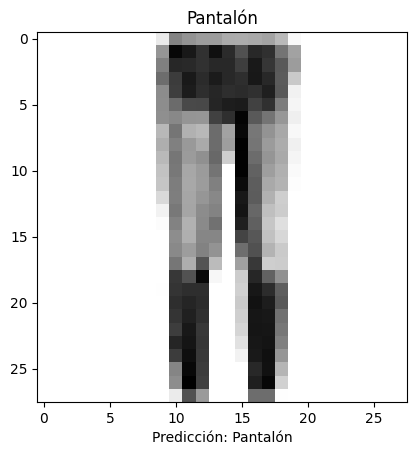

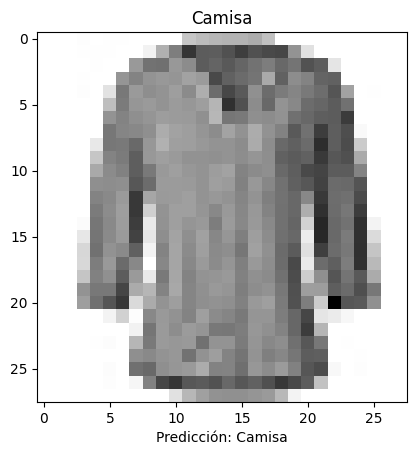

In [ ]:
# Para visualizar todas las imágenes de prueba
for i in range(5):
    plt.imshow(imagenes_prueba[i], cmap=plt.cm.binary)
    plt.xlabel('Predicción: ' + clase_imagenes[np.argmax(prediccion[i])])
    plt.title(clase_imagenes[labels_prueba[i]])
    plt.show()